In [1]:

# Loding Olympic medal data for Olympic games between 1896 and 2012


In [2]:
import pandas as pd
import numpy as np

In [3]:
medals = pd.read_csv("E:/DataCamp/9. Manipulating DataFrames with pandas/6. Datasets/all_medalists.csv")

In [4]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [5]:
#  Using .value_counts() for ranking

In [6]:
# Select the 'NOC' column of medals: country_names -- a series --

country_names = medals['NOC']

country_names.head(3)

0    HUN
1    AUT
2    GRE
Name: NOC, dtype: object

In [7]:
# Count the number of medals won by each country: medal_counts

medal_counts = country_names.value_counts()

In [8]:
# Print top 15 countries ranked by medals

print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


In [9]:
# Using .pivot_table() to count medals by type

In [10]:
# Construct the pivot table: counted

counted = medals.pivot_table(index='NOC',values='Athlete',columns='Medal',aggfunc='count')

In [11]:
counted.head(5)

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0
ANZ,5.0,20.0,4.0
ARG,88.0,68.0,83.0


In [12]:
# Create the new column: counted['totals']

counted['totals'] = counted.sum(axis='columns')

In [13]:
counted.head(5)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
AFG,1.0,NaN,NaN,1.0
AHO,NaN,NaN,1.0,1.0
ALG,8.0,4.0,2.0,14.0
ANZ,5.0,20.0,4.0,29.0
ARG,88.0,68.0,83.0,239.0


In [14]:
# Sort counted by the 'totals' column

counted = counted.sort_values('totals', ascending=False)

In [15]:
counted.head(5)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0


In [16]:
# Removing duplicates

In [17]:
# Select columns: ev_gen

ev_gen = medals[['Event_gender','Gender']]

In [18]:
type(ev_gen)

pandas.core.frame.DataFrame

In [19]:
ev_gen.head()

,Event_gender,Gender
0,M,Men
1,M,Men
2,M,Men
3,M,Men
4,M,Men


In [20]:
# Drop duplicate pairs: ev_gen_uniques

ev_gen_uniques = ev_gen.drop_duplicates()
        


In [21]:
ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


In [22]:
# Group medals by the two columns: medals_by_gender

medals_by_gender = medals.groupby(['Event_gender','Gender'])

medals_by_gender

In [23]:
# Create a DataFrame with a group count: medal_count_by_gender

medal_count_by_gender = medals_by_gender.count()


In [24]:
# Print medal_count_by_gender

print(medal_count_by_gender)

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


In [25]:
 # Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')
sus.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [26]:
# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus] 

In [27]:
# Print suspect

print(suspect)

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


In [28]:
# This shows that the data has incorrect row where athelete, as the Gender of athelete is Male but placed under Female Event
# To rectify this error, lets remove this row.

new_medals = medals.drop(medals.index[23675])

In [29]:
suspect_new = new_medals[sus]

c:\users\name\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [30]:
suspect_new

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal


In [31]:
new_medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [32]:
# Group medals by the two columns: medals_by_gender
medals_by_gender_1 = new_medals.groupby(['Event_gender','Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender_1 = medals_by_gender_1.count()

# Print medal_count_by_gender
print(medal_count_by_gender_1)

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Women    7277  
X            Men      1653  
             Women     218  


In [33]:
# Now the data has no discrepancy
# 

In [34]:
# Using .nunique() to rank by distinct sports

In [35]:
# Group medals by 'NOC': country_grouped

country_grouped = new_medals.groupby('NOC')

country_grouped

In [36]:
# Compute the number of distinct sports in which each country won medals: Nsports

Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order

Nsports = Nsports.sort_values(ascending=False)

Nsports.head()

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
Name: Sport, dtype: int64

In [37]:
# ----------Counting USA vs. USSR Cold War Olympic Sports----------

In [38]:
# Create a Boolean Series that is True when 'Edition' is between 1952 and 1988: during_cold_war
during_cold_war = (new_medals.Edition>=1952) & (new_medals.Edition<=1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = new_medals.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = new_medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


In [39]:
#----------Counting USA vs. USSR Cold War Olympic Medals-----------

In [40]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = new_medals.pivot_table(index='Edition',columns='NOC',values='Athlete',aggfunc='count' )

# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')

most_medals

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [41]:
# Print most_medals.value_counts()

print(most_medals.value_counts())

URS    8
USA    2
dtype: int64


In [42]:
# ------Visualizing USA Medal Counts by Edition: Line Plot------

In [43]:
# Create the DataFrame: usa
usa = new_medals[new_medals.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

usa_medals_by_year.head(6)


Edition  Medal 
1896     Bronze     2
         Gold      11
         Silver     7
1900     Bronze    14
         Gold      27
         Silver    14
Name: Athlete, dtype: int64

In [44]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

usa_medals_by_year.head(5)


Medal,Bronze,Gold,Silver
Edition,,,
1896,2,11,7
1900,14,27,14
1904,111,146,137
1908,15,34,14
1912,31,45,25


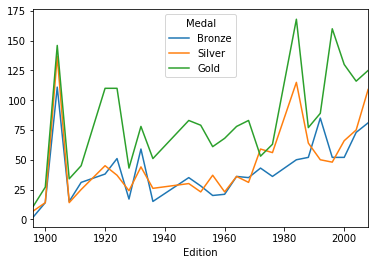

In [50]:
# Plot the DataFrame usa_medals_by_year
import matplotlib.pyplot as plt
usa_medals_by_year.plot()
plt.show()

In [46]:
# --------Visualizing USA Medal Counts by Edition: Area Plot--------

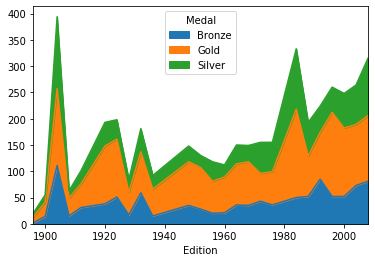

In [47]:
# Create the DataFrame: usa
usa = new_medals[new_medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

In [48]:
# -------Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals-------

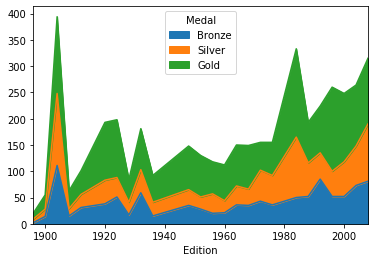

In [49]:
# Redefine 'Medal' as an ordered categorical
new_medals.Medal = pd.Categorical(values=new_medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

# Create the DataFrame: usa
usa = new_medals[new_medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()